In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

### 1. Load data

In [2]:
dpath = Path("../../py_data/HEXPractice/disHEX")
l_hex = 6.1
n_hex = 100
ks = [1, 50, 100, 150, 200]
nk = len(ks)

'''
mode:
cinlet: constant inlents
rinlet: random inlents
'''
mode = "rinlet"

# f_type: 0 - parallel flow, 1 - counter flow
f_type = 0

if f_type == 0:
    dfs = pd.read_csv(f"{dpath}/{mode}/parallel.csv", header=0)
    for k in ks:
        exec(f'df_day{k} = pd.read_csv("{dpath}/{mode}/parallel_day_{k}.csv", header=0)')
elif f_type == 1:
    dfs = pd.read_csv(f"{dpath}/{mode}/counter.csv", header=0)
    for k in ks:
        exec(f'df_day{k} = pd.read_csv("{dpath}/{mode}/counter_day_{k}.csv", header=0)')

In [3]:
dfs.head()

,Day,F1m,F1i,F1o,F1v,F1D,F1Re,F1Nu,F1h,F1R,...,F2Re,F2h,F2R,F2Cf,F2Tau,dP2,Sigma2,Rf2,UA,Q
0,1,0.269711,512.756588,528.026321,0.240751,0.045800,2756.600620,69.517955,182.143113,0.625521,...,4903.194785,521.510811,0.196967,0.010941,0.043034,5.335565,0.0,0.0,121.481724,12009.283203
1,2,0.309590,524.286240,530.123148,0.277897,0.045672,3173.039839,77.799772,204.412374,0.558934,...,4620.675963,497.329716,0.206544,0.011128,0.038874,4.819748,0.0,0.0,124.587553,5269.350717
2,3,0.321260,518.571045,526.373444,0.289574,0.045577,3299.500471,80.270591,211.343281,0.541730,...,5294.594443,554.556958,0.185230,0.010704,0.049096,6.087092,0.0,0.0,126.364465,7309.234983
3,4,0.323718,466.224861,486.052515,0.292989,0.045484,3331.576383,80.894264,213.422659,0.537553,...,4950.651121,525.544937,0.195455,0.010910,0.043751,5.424412,0.0,0.0,121.311132,18716.552441
4,5,0.386489,434.148718,437.654663,0.351038,0.045404,3984.612221,93.348374,246.715401,0.465835,...,6237.488848,632.248525,0.162468,0.010225,0.065089,8.069978,0.0,0.0,134.620366,3951.202178


In [4]:
days = dfs["Day"].to_numpy()

### 2. Plots of data (overall or average) vs. days

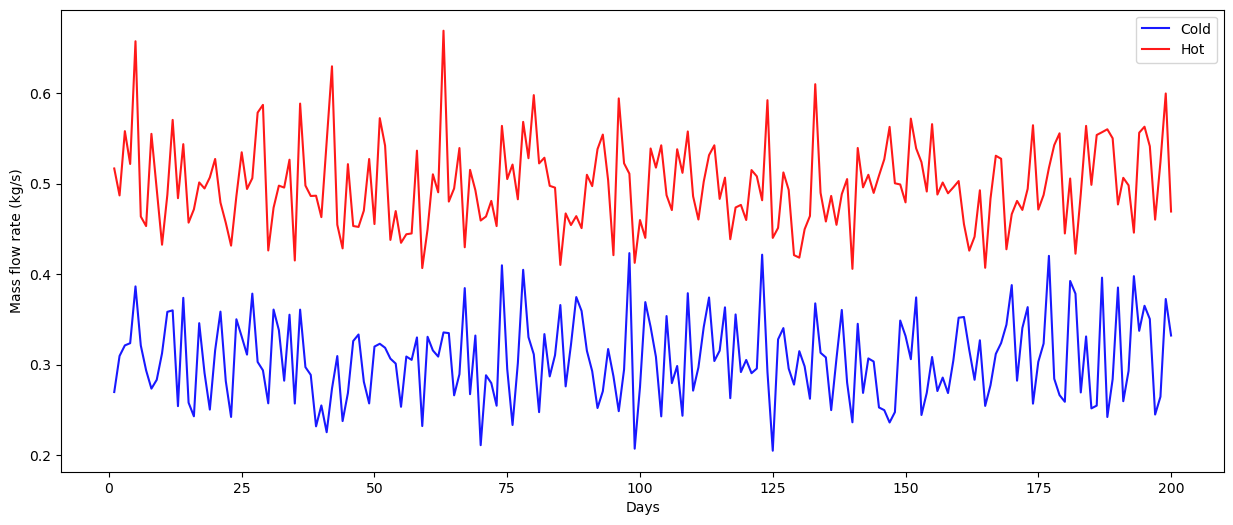

In [5]:
# mass flow vs. time
fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(15)
ax.plot(days, dfs["F1m"].to_numpy(), c="blue", alpha=0.9, label="Cold")
ax.plot(days, dfs["F2m"].to_numpy(), c="r", alpha=0.9, label="Hot")
ax.set_ylabel("Mass flow rate (kg/s)")
ax.set_xlabel("Days")
ax.legend(loc="upper right")
plt.show()

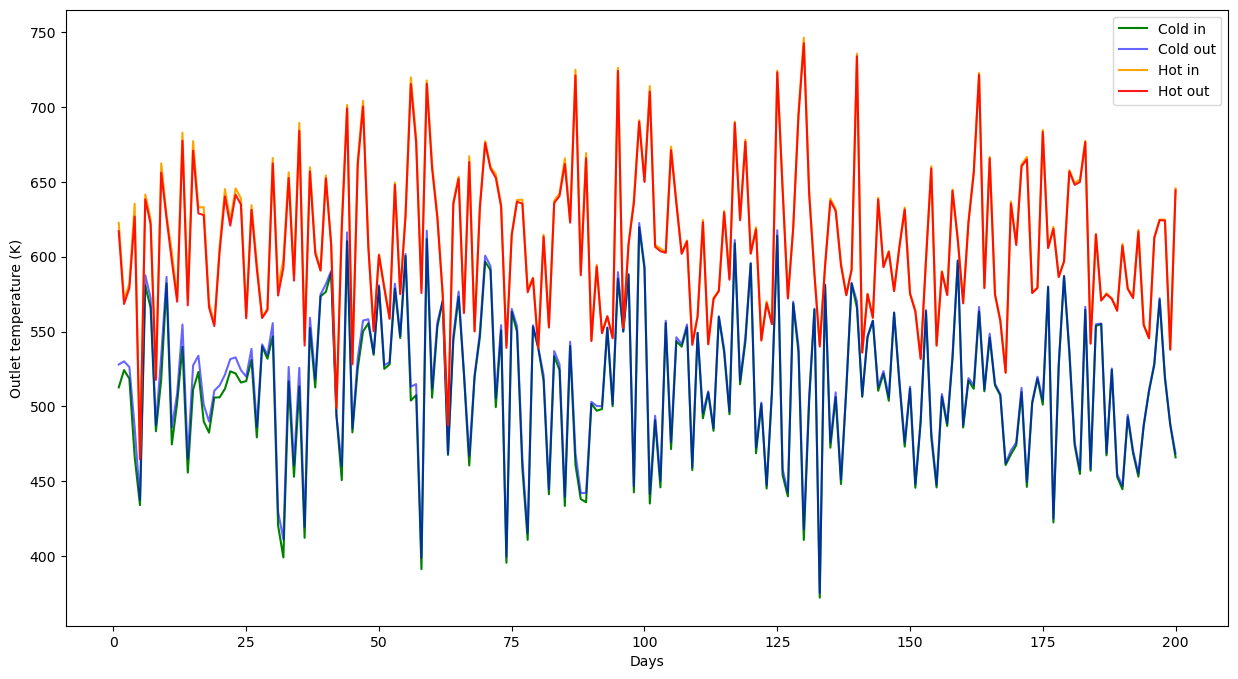

In [6]:
# outlet temperatures vs. time
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(15)
ax.plot(days, dfs["F1i"].to_numpy(), c="green", label="Cold in")
ax.plot(days, dfs["F1o"].to_numpy(), c="blue", alpha=0.6, label="Cold out")
ax.plot(days, dfs["F2i"].to_numpy(), c="orange", label="Hot in")
ax.plot(days, dfs["F2o"].to_numpy(), c="r", alpha=0.9, label="Hot out")
ax.set_ylabel("Outlet temperature (K)")
ax.set_xlabel("Days")
ax.legend(loc="upper right")
plt.show()


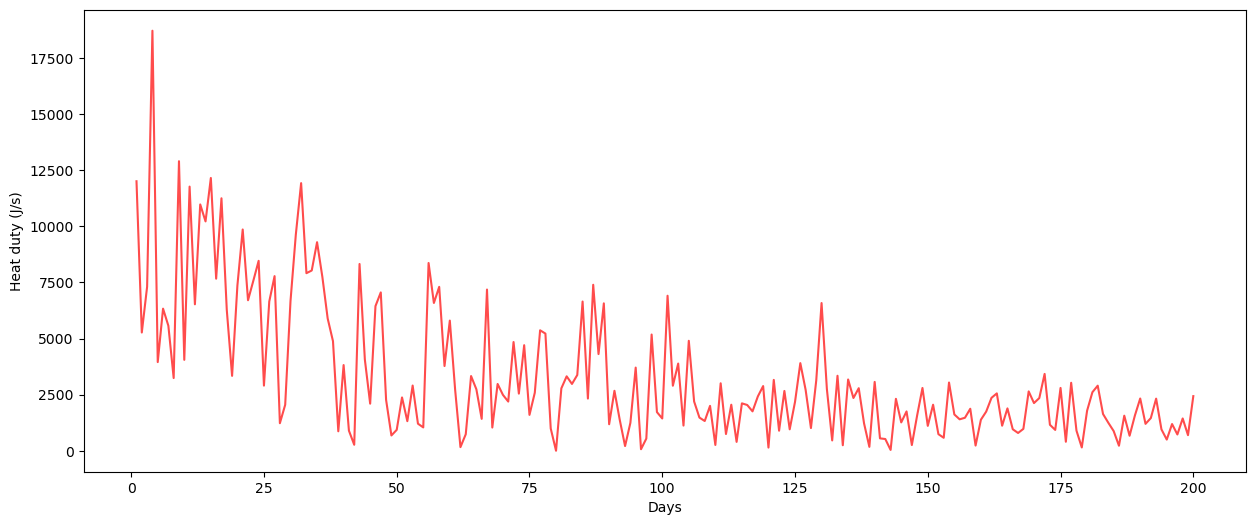

In [7]:
# Heat duty vs. time
plt.figure(figsize=(15, 6))
plt.plot(days, dfs["Q"].to_numpy(), c="r", alpha=0.7)
plt.ylabel("Heat duty (J/s)")
plt.xlabel("Days")
plt.show()

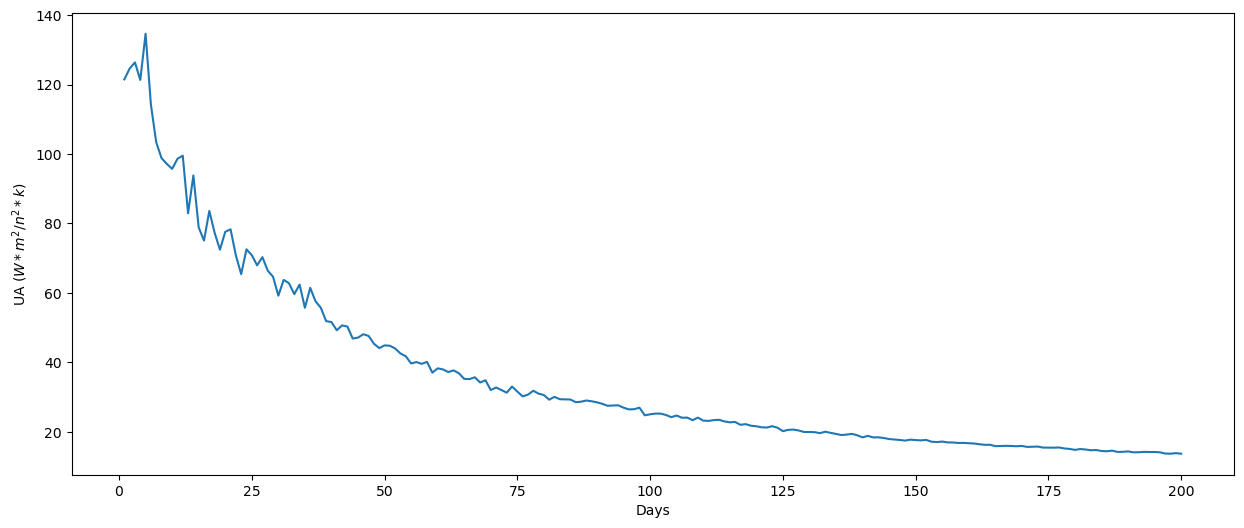

In [8]:
# UA vs. time
plt.figure(figsize=(15, 6))
plt.plot(days, dfs["UA"].to_numpy())
plt.ylabel("UA ($W*m^2/n^2*k$)")
plt.xlabel("Days")
plt.show()

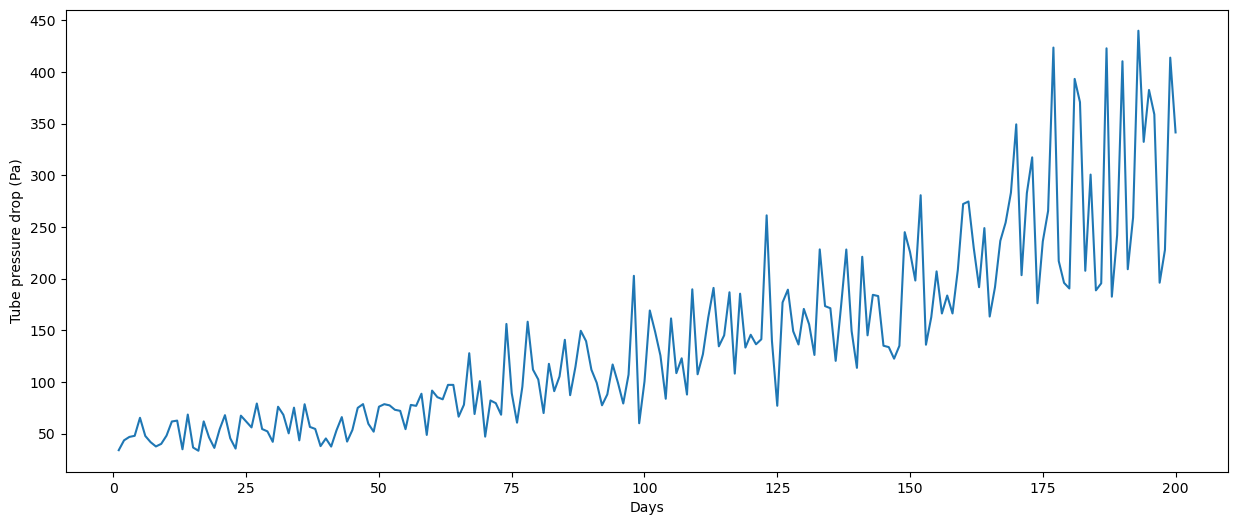

In [9]:
# dP vs. time
plt.figure(figsize=(15, 6))
plt.plot(days, dfs["dP1"].to_numpy())
plt.ylabel("Tube pressure drop (Pa)")
plt.xlabel("Days")
plt.show()

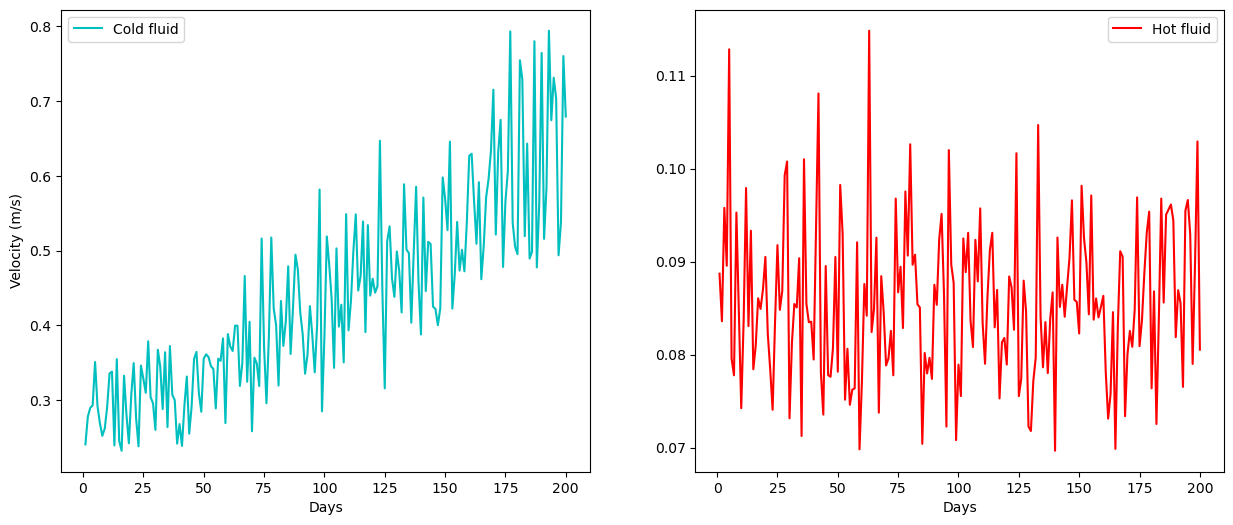

In [10]:
# Velocity vs. time
fig, ax = plt.subplots(1, 2)
fig.set_figheight(6)
fig.set_figwidth(15)
ax[0].plot(days, dfs["F1v"].to_numpy(), c="c", label="Cold fluid")
ax[1].plot(days, dfs["F2v"].to_numpy(), c="r", label="Hot fluid")
ax[0].set_ylabel("Velocity (m/s)")
ax[0].set_xlabel("Days")
ax[1].set_xlabel("Days")
ax[0].legend()
ax[1].legend()
plt.show()


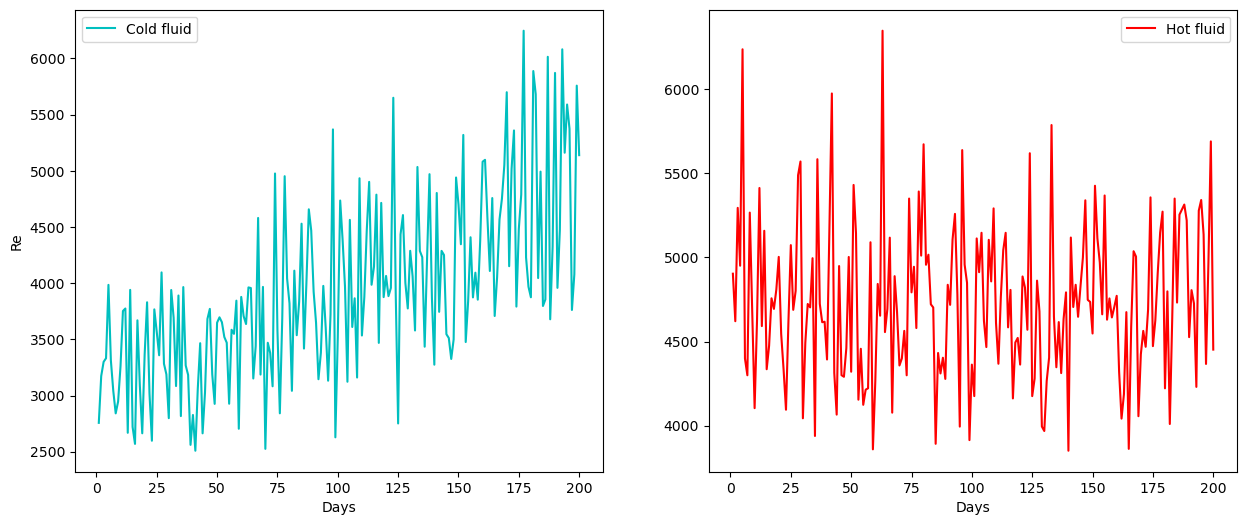

In [11]:
# Re vs. time
fig, ax = plt.subplots(1, 2)
fig.set_figheight(6)
fig.set_figwidth(15)
ax[0].plot(days, dfs["F1Re"].to_numpy(), c="c", label="Cold fluid")
ax[1].plot(days, dfs["F2Re"].to_numpy(), c="r", label="Hot fluid")
ax[0].set_ylabel("Re")
ax[0].set_xlabel("Days")
ax[1].set_xlabel("Days")
ax[0].legend()
ax[1].legend()
plt.show()


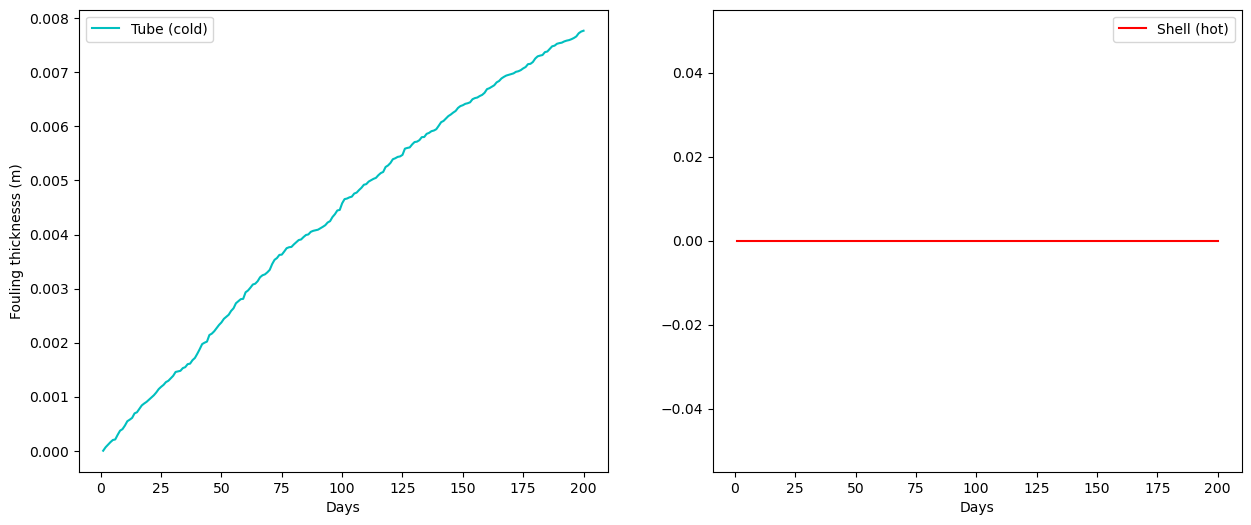

In [12]:
# Fouling thickness vs. time
fig, ax = plt.subplots(1, 2)
fig.set_figheight(6)
fig.set_figwidth(15)
ax[0].plot(days, dfs["Sigma1"].to_numpy(), c="c", label="Tube (cold)")
ax[1].plot(days, dfs["Sigma2"].to_numpy(), c="r", label="Shell (hot)")
ax[0].set_ylabel("Fouling thicknesss (m)")
ax[0].set_xlabel("Days")
ax[1].set_xlabel("Days")
ax[0].legend()
ax[1].legend()
plt.show()

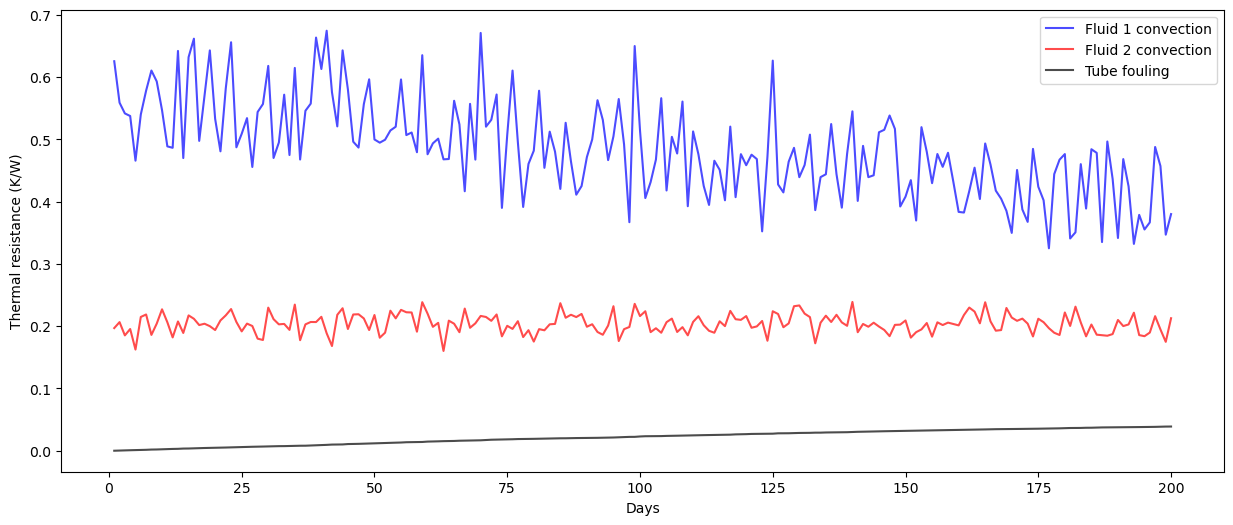

In [27]:
# Resistances vs. time
plt.figure(figsize=(15, 6))
plt.plot(days, dfs["F1R"].to_numpy(), c="b", alpha=0.7, label="Fluid 1 convection")
plt.plot(days, dfs["F2R"].to_numpy(), c="r", alpha=0.7, label="Fluid 2 convection")
plt.plot(days, dfs["Rf1"].to_numpy(), c="black", alpha=0.7, label="Tube fouling")
plt.ylabel("Thermal resistance (K/W)")
plt.xlabel("Days")
plt.legend()
plt.show()

### 2. Plots of data vs. HEX distance of specific days

In [14]:
x = [i * l_hex / n_hex for i in range(n_hex)]

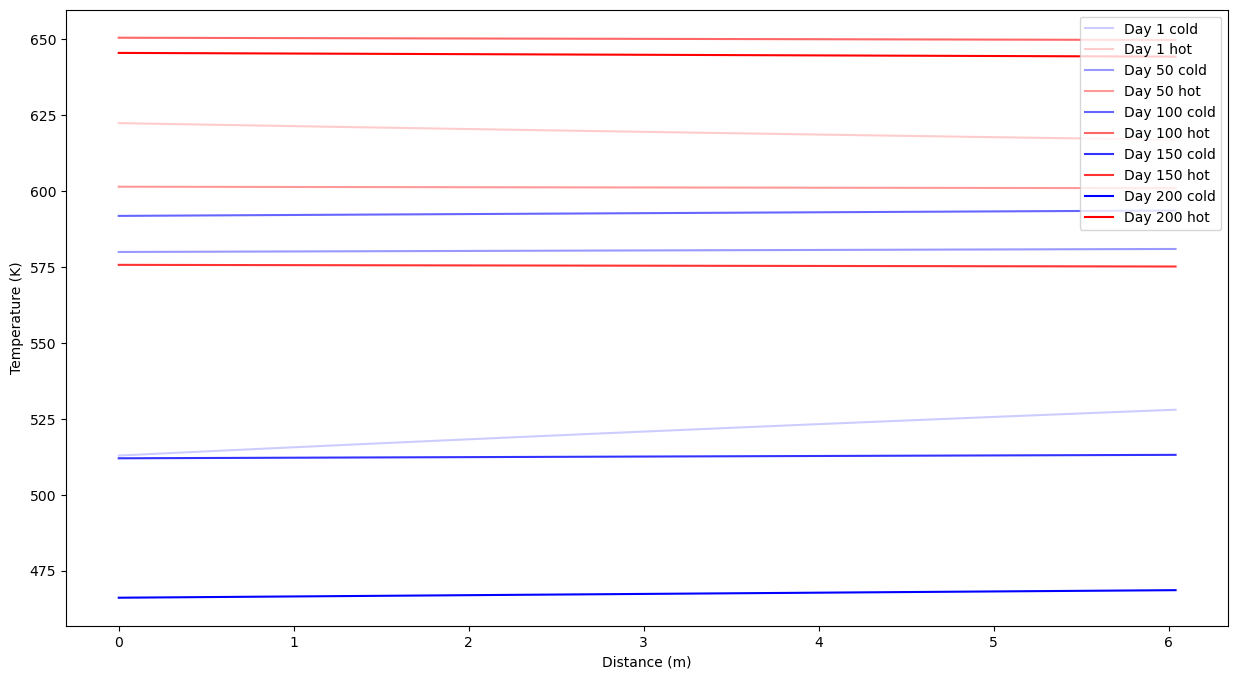

In [15]:
# temperatures vs. distance
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(15)

for k, i in zip(ks, range(1, nk + 1)):
    exec(f'ax.plot(x, df_day{k}["F1T"].to_numpy(), c="blue", alpha={1 / nk * i}, label="Day {k} cold")')
    exec(f'ax.plot(x, df_day{k}["F2T"].to_numpy(), c="red", alpha={1 / nk * i}, label="Day {k} hot")')
ax.set_ylabel("Temperature (K)")
ax.set_xlabel("Distance (m)")
ax.legend(loc="upper right")
plt.show()

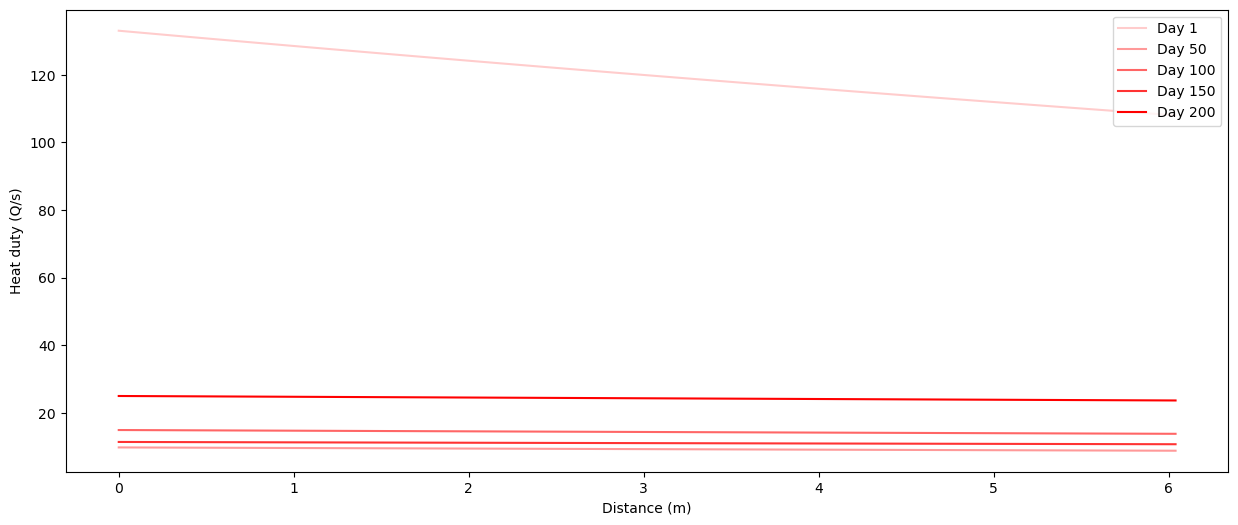

In [16]:
# heat duty vs. distance
fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(15)

for k, i in zip(ks, range(1, nk + 1)):
    exec(f'ax.plot(x, df_day{k}["Q"].to_numpy(), c="r", alpha={1 / nk * i}, label="Day {k}")')
ax.set_ylabel("Heat duty (Q/s)")
ax.set_xlabel("Distance (m)")
ax.legend(loc="upper right")
plt.show()

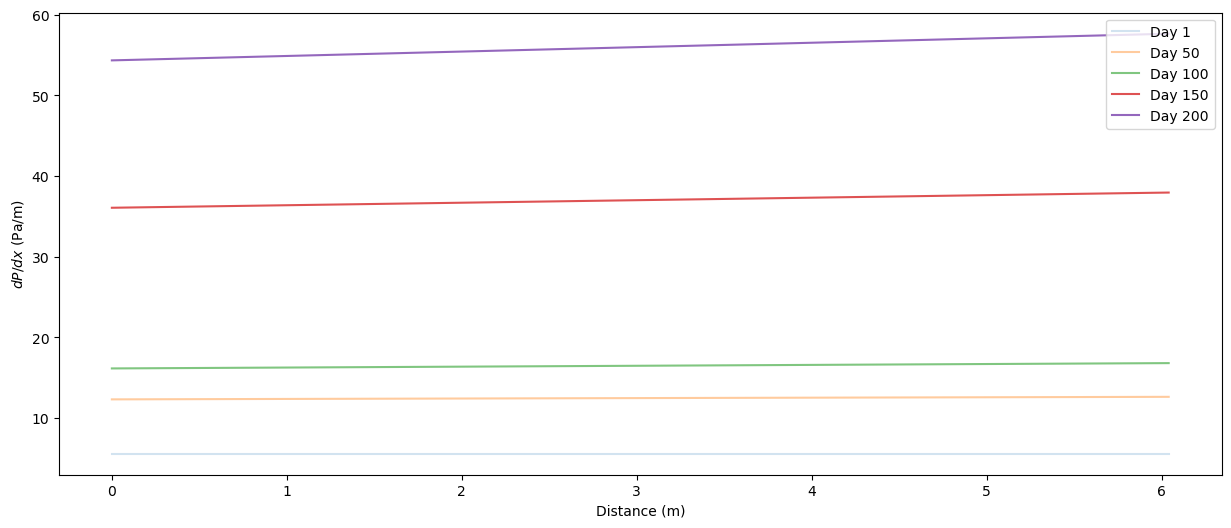

In [17]:
# pressure drop vs. distance
fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(15)

for k, i in zip(ks, range(1, nk + 1)):
    exec(f'ax.plot(x, df_day{k}["dP1/dx"].to_numpy(), alpha={1 / nk * i}, label="Day {k}")')
ax.set_ylabel("$dP/dx$ (Pa/m)")
ax.set_xlabel("Distance (m)")
ax.legend(loc="upper right")
plt.show()

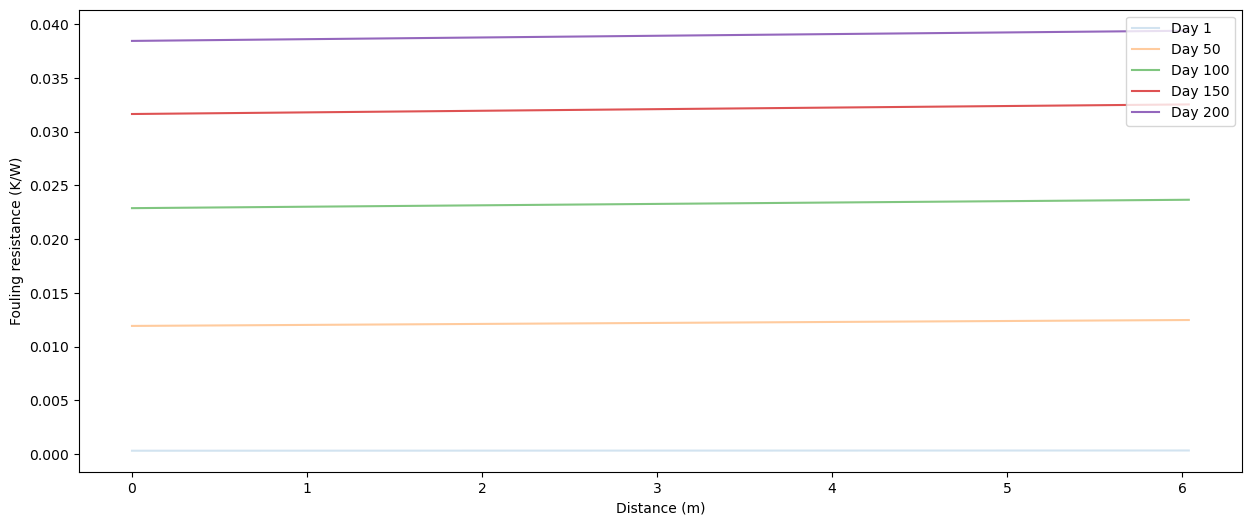

In [18]:
# fouling resistance vs. distance
fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(15)

for k, i in zip(ks, range(1, nk + 1)):
    exec(f'ax.plot(x, df_day{k}["Rf1"].to_numpy(), alpha={1 / nk * i}, label="Day {k}")')
ax.set_ylabel("Fouling resistance (K/W)")
ax.set_xlabel("Distance (m)")
ax.legend(loc="upper right")
plt.show()

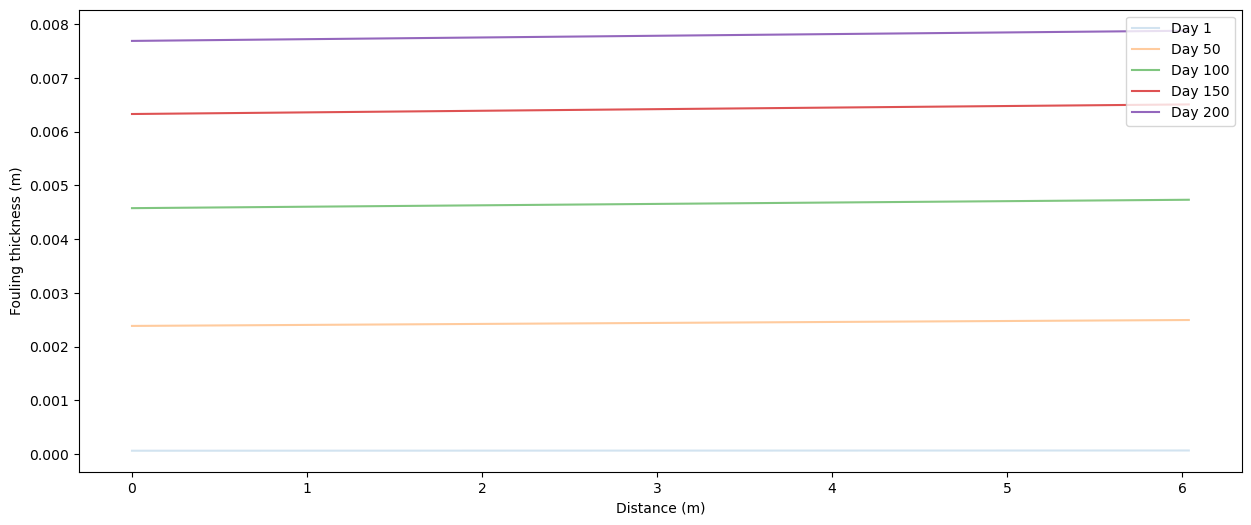

In [19]:
# fouling thickness vs. distance
fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(15)

for k, i in zip(ks, range(1, nk + 1)):
    exec(f'ax.plot(x, df_day{k}["Sigma1"].to_numpy(), alpha={1 / nk * i}, label="Day {k}")')
ax.set_ylabel("Fouling thickness (m)")
ax.set_xlabel("Distance (m)")
ax.legend(loc="upper right")
plt.show()

### 3. Compare lumped result with distributed one

In [20]:
spath1 = Path(f"{dpath}/../lumpHEX/{mode}")
if f_type == 0:
    df1 = pd.read_csv(f"{spath1}/parallel.csv", header=0)
elif f_type == 1:
    df1 = pd.read_csv(f"{spath1}/counter.csv", header=0)

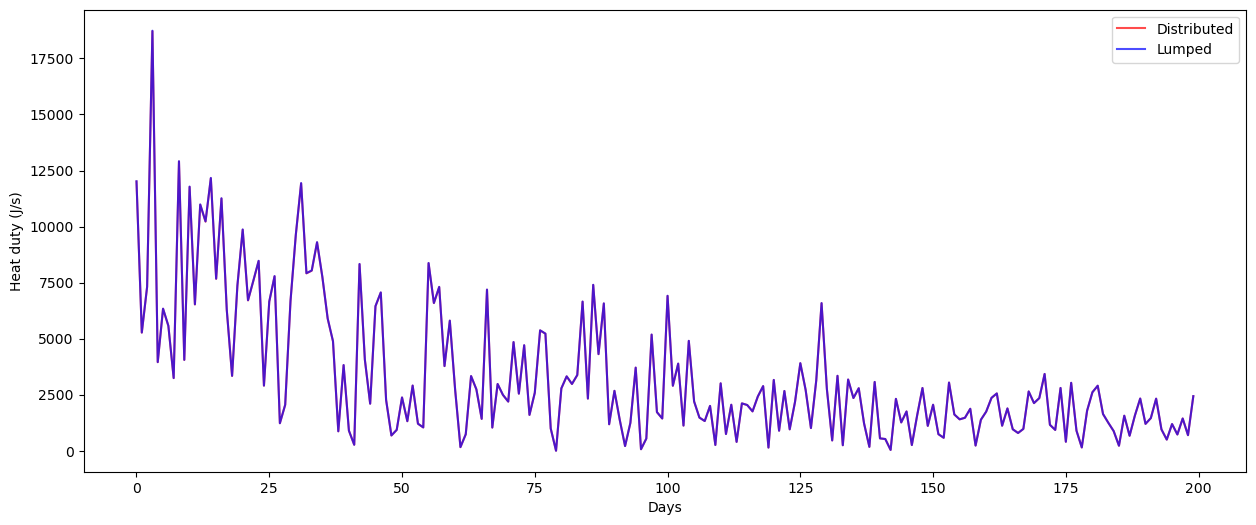

In [21]:
# Heat duty vs. time
plt.figure(figsize=(15, 6))
plt.plot(dfs["Q"].to_numpy(), c="r", alpha=0.7, label="Distributed")
plt.plot(df1["Q"].to_numpy(), c="b", alpha=0.7, label="Lumped")
plt.ylabel("Heat duty (J/s)")
plt.xlabel("Days")
plt.legend()
plt.show()

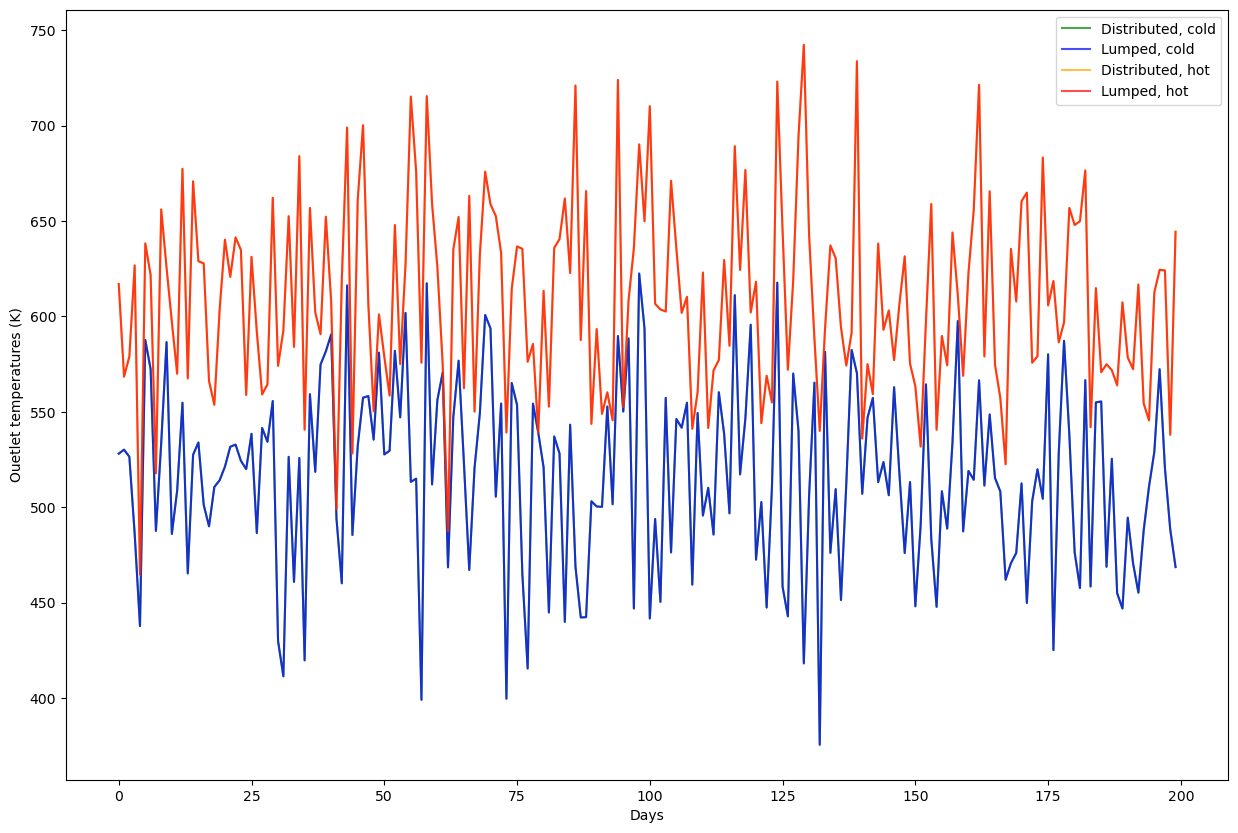

In [22]:
# Outlet temperature vs. time
plt.figure(figsize=(15, 10))
plt.plot(dfs["F1o"].to_numpy(), c="green", alpha=0.7, label="Distributed, cold")
plt.plot(df1["F1o"].to_numpy(), c="blue", alpha=0.7, label="Lumped, cold")

plt.plot(dfs["F2o"].to_numpy(), c="orange", alpha=0.7, label="Distributed, hot")
plt.plot(df1["F2o"].to_numpy(), c="red", alpha=0.7, label="Lumped, hot")
plt.ylabel("Ouetlet temperatures (K)")
plt.xlabel("Days")
plt.legend()
plt.show()

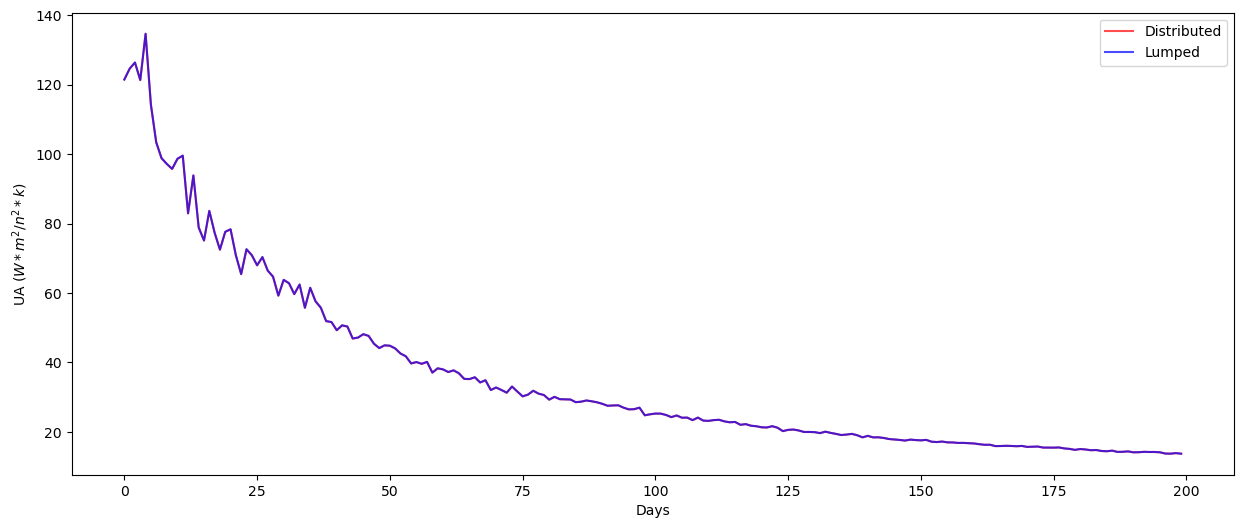

In [23]:
# UA vs. time, lumped should be about 100 times
plt.figure(figsize=(15, 6))
plt.plot(dfs["UA"], c="r", alpha=0.7, label="Distributed")
plt.plot(df1["UA"], c="b", alpha=0.7, label="Lumped")
plt.ylabel("UA ($W*m^2/n^2*k$)")
plt.xlabel("Days")
plt.legend()
plt.show()

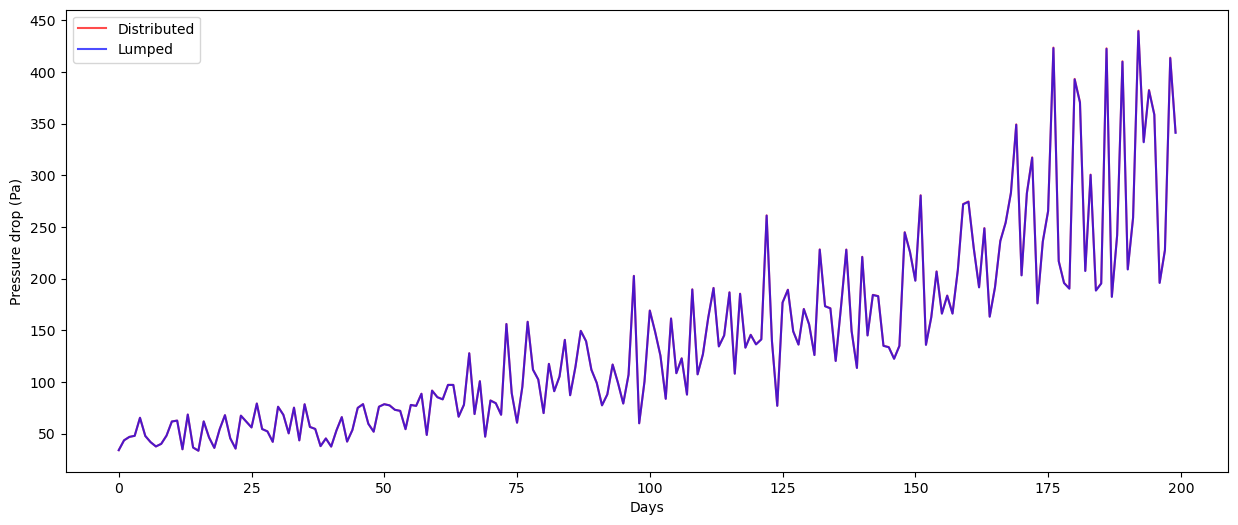

In [24]:
# dP vs. time
plt.figure(figsize=(15, 6))
plt.plot(dfs["dP1"], c="r", alpha=0.7, label="Distributed")
plt.plot(df1["dP1"], c="b", alpha=0.7, label="Lumped")
plt.ylabel("Pressure drop (Pa)")
plt.xlabel("Days")
plt.legend()
plt.show()

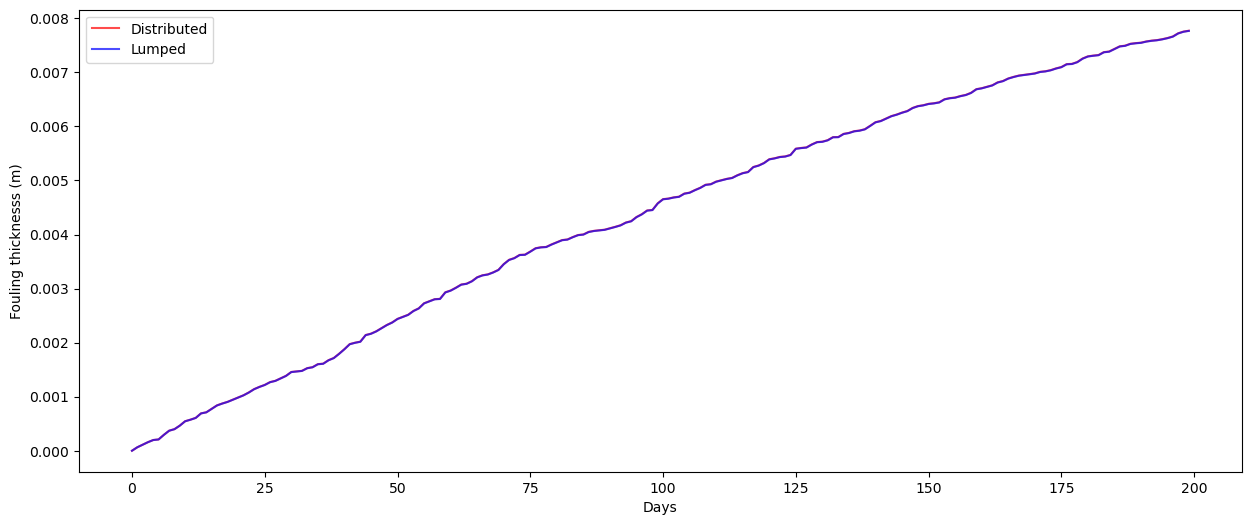

In [25]:
# Fouling thickness vs. time
plt.figure(figsize=(15, 6))
plt.plot(dfs["Sigma1"], c="r", alpha=0.7, label="Distributed")
plt.plot(df1["Sigma1"], c="b", alpha=0.7, label="Lumped")
plt.ylabel("Fouling thicknesss (m)")
plt.xlabel("Days")
plt.legend()
plt.show()